In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

path = "C:\\Users\\9111650T\\Documents\\Hadoop\\Garmin"

In [2]:
# display all csv from my folder
filenames = glob.glob(path + "/*.csv")
for file in filenames:
    print(os.path.basename(file))

Activities - Copie.csv
Activities.csv
Floors Climbed_2019.csv
Floors Climbed_2020.csv
Floors Climbed_2021.csv
Floors.csv
running.csv
Sleep Time_2019.csv
Sleep Time_2020.csv
Sleep Time_2021.csv
Sleep.csv
Steps.csv
Steps_2019.csv
Steps_2020.csv
Steps_2021.csv
VO₂ Max.csv


In [3]:
my_floors = [["Floors Climbed_2019.csv", 2019], 
             ["Floors Climbed_2020.csv", 2020], 
             ["Floors Climbed_2021.csv", 2021]
            ]

my_steps = [["Steps_2019.csv", 2019], 
            ["Steps_2020.csv", 2020], 
            ["Steps_2021.csv", 2021]
            ]

my_sleeps = [["Sleep Time_2019.csv", 2019], 
             ["Sleep Time_2020.csv", 2020], 
             ["Sleep Time_2021.csv", 2021]
            ]

In [4]:
def Add_Year(my_list):
    """
    add year columns for each files
    """
    for ele in my_list:
        df = pd.read_csv(ele[0])
        df['year'] = ele[1]
        df.to_csv(ele[0], index=False)
    return df

In [5]:
def Concat_File(file_to_concat, file_name):
    """
    merge all survey csv in a unique file for each activity: floors climbed, steps, sleep
    """
    all_files = glob.glob(os.path.join(path, file_to_concat))
    
    # merge all Base.csv
    df_from_each_file =(pd.read_csv(f) for f in all_files)
    df_merged = pd.concat(df_from_each_file, ignore_index=True)
    df_merged.to_csv(file_name, index=False)

In [6]:
def Read_file(filename):
    df = pd.read_csv(filename)
    return df

In [7]:
Concat_File("Steps_*.csv", "Steps.csv")
Concat_File("Sleep *.csv", "Sleep.csv")
Concat_File("Floors *.csv", "Floors.csv")

In [8]:
#call my function et put them into a df
floors = Add_Year(my_floors)
steps = Add_Year(my_steps)
sleeps = Add_Year(my_sleeps)

In [9]:
#read activites csv
activities = Read_file("Activities.csv")
activities.columns.to_list()

['Activity Type',
 'Date',
 'Favorite',
 'Title',
 'Distance',
 'Calories',
 'Time',
 'Avg HR',
 'Max HR',
 'Avg Run Cadence',
 'Max Run Cadence',
 'Avg Pace',
 'Best Pace',
 'Total Ascent',
 'Total Descent',
 'Avg Stride Length',
 'Avg Vertical Ratio',
 'Avg Vertical Oscillation',
 'Training Stress Score®',
 'Grit',
 'Flow',
 'Total Reps',
 'Total Sets',
 'Dive Time',
 'Min Temp',
 'Surface Interval',
 'Decompression',
 'Best Lap Time',
 'Number of Laps',
 'Max Temp',
 'Moving Time',
 'Elapsed Time',
 'Min Elevation',
 'Max Elevation']

## Activities csv : Cleaning data

In [10]:
#suppress unuseful columns
activities.drop(activities.loc[:, 'Avg Vertical Ratio':'Moving Time'].columns, axis=1, inplace=True)
activities.drop(["Favorite","Total Ascent","Total Descent", "Min Elevation",
                 "Max Elevation"], axis=1, inplace=True)

In [11]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Activity Type      406 non-null    object 
 1   Date               406 non-null    object 
 2   Title              406 non-null    object 
 3   Distance           406 non-null    float64
 4   Calories           406 non-null    object 
 5   Time               406 non-null    object 
 6   Avg HR             406 non-null    int64  
 7   Max HR             406 non-null    int64  
 8   Avg Run Cadence    406 non-null    object 
 9   Max Run Cadence    406 non-null    object 
 10  Avg Pace           406 non-null    object 
 11  Best Pace          406 non-null    object 
 12  Avg Stride Length  406 non-null    float64
 13  Elapsed Time       406 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 44.5+ KB


In [12]:
activities.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Elapsed Time
0,Running,2021-12-19 10:17:13,Paris Running,8.17,381,00:55:59,149,164,192,206,6:51,5:48,0.76,00:55:59
1,Running,2021-12-18 09:41:04,Paris Running,9.63,473,01:03:57,159,177,190,198,6:39,5:27,0.79,01:03:57
2,Running,2021-12-11 09:23:22,Paris Running,7.17,370,00:47:01,163,176,192,200,6:33,5:06,0.79,00:47:01
3,Running,2021-11-27 09:28:34,Paris Running,9.20,448,00:56:09,165,180,194,206,6:06,5:14,0.85,00:56:09
4,Running,2021-11-21 10:10:43,Paris Running,8.65,418,00:56:22,156,178,192,206,6:31,5:45,0.80,00:56:37


In [13]:
activities["Activity Type"].unique()

array(['Running', 'Virtual Running', 'Walking', 'Cycling',
       'Strength Training', 'Other', 'Cardio'], dtype=object)

In [14]:
#only keep information of running activity 
activities.drop(activities[activities["Activity Type"] != "Running"].index, inplace=True)
activities.drop(activities[activities["Distance"] < 1].index, inplace=True)

In [15]:
activities["Activity Type"].unique()

array(['Running'], dtype=object)

### Convert into the correct types

In [16]:
#Convert col 'Date', 'Avg Pace', 'Best Pace', 'Elapsed Time' into datetime
activities["Date"] = pd.to_datetime(activities["Date"])
activities["Avg Pace"] = pd.to_datetime(activities["Avg Pace"], format='%M:%S')
activities["Best Pace"] = pd.to_datetime(activities["Best Pace"], format='%M:%S')
activities["Elapsed Time"] = pd.to_datetime(activities["Elapsed Time"])

#create col new_date and hour from Date
#activities['new_date'] = activities["Date"].dt.date
#activities['hour'] = activities["Date"].dt.time

#convert 'Time', 'Avg Pace', 'Best Pace', 'Elapced Time' objects to the number of minutes
activities["Avg Pace"] = activities["Avg Pace"].dt.hour*60 + activities["Avg Pace"].dt.minute + activities["Avg Pace"].dt.second/60
activities["Best Pace"] = activities["Best Pace"].dt.hour*60 + activities["Best Pace"].dt.minute + activities["Best Pace"].dt.second/60
activities["Elapsed Time"] = activities["Elapsed Time"].dt.hour*60 + activities["Elapsed Time"].dt.minute + activities["Elapsed Time"].dt.second/60

In [17]:
activities['activityMinute'] = pd.to_datetime(activities["Time"])
activities["activityMinute"] = activities["activityMinute"].dt.hour*60 + activities["activityMinute"].dt.minute + activities["activityMinute"].dt.second/60

In [18]:
#add 'Avg Speed' and 'Best Speed' columns
activities['Avg Speed'] = 60 / activities['Avg Pace']
activities['Best Speed'] = 60 / activities['Best Pace']

In [19]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 401
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Activity Type      236 non-null    object        
 1   Date               236 non-null    datetime64[ns]
 2   Title              236 non-null    object        
 3   Distance           236 non-null    float64       
 4   Calories           236 non-null    object        
 5   Time               236 non-null    object        
 6   Avg HR             236 non-null    int64         
 7   Max HR             236 non-null    int64         
 8   Avg Run Cadence    236 non-null    object        
 9   Max Run Cadence    236 non-null    object        
 10  Avg Pace           236 non-null    float64       
 11  Best Pace          236 non-null    float64       
 12  Avg Stride Length  236 non-null    float64       
 13  Elapsed Time       236 non-null    float64       
 14  activityMi

In [20]:
activities.drop(["Activity Type"], axis=1, inplace=True)


In [21]:
activities["activityYear"] = activities.Date.dt.year
activities["activityMonth"] = activities.Date.dt.month
activities["activityDay"] = activities.Date.dt.dayofweek

activities["activityMonthName"] = activities.activityMonth.map({1:"January", 
                                                                2:"February", 
                                                                3:"March", 
                                                                4:"April",
                                                                5:"May", 
                                                                6:"June", 
                                                                7:"July", 
                                                                8:"August", 
                                                                9:"September", 
                                                                10:"October", 
                                                                11:"November", 
                                                                12:"December"})

activities["activityDayName"] = activities.activityDay.map({0:"Monday", 
                                                            1:"Tuesday", 
                                                            2:"Wednesday", 
                                                            3:"Thursday",
                                                            4:"Friday", 
                                                            5:"Saturday", 
                                                            6:"Sunday"})                                                          

In [22]:
activities.head()

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,...,Avg Stride Length,Elapsed Time,activityMinute,Avg Speed,Best Speed,activityYear,activityMonth,activityDay,activityMonthName,activityDayName
0,2021-12-19 10:17:13,Paris Running,8.17,381,00:55:59,149,164,192,206,6.850000,...,0.76,55.983333,55.983333,8.759124,10.344828,2021,12,6,December,Sunday
1,2021-12-18 09:41:04,Paris Running,9.63,473,01:03:57,159,177,190,198,6.650000,...,0.79,63.950000,63.950000,9.022556,11.009174,2021,12,5,December,Saturday
2,2021-12-11 09:23:22,Paris Running,7.17,370,00:47:01,163,176,192,200,6.550000,...,0.79,47.016667,47.016667,9.160305,11.764706,2021,12,5,December,Saturday
3,2021-11-27 09:28:34,Paris Running,9.20,448,00:56:09,165,180,194,206,6.100000,...,0.85,56.150000,56.150000,9.836066,11.464968,2021,11,5,November,Saturday
4,2021-11-21 10:10:43,Paris Running,8.65,418,00:56:22,156,178,192,206,6.516667,...,0.80,56.616667,56.366667,9.207161,10.434783,2021,11,6,November,Sunday


In [23]:
activities["Title"].unique()

array(['Paris Running', 'Grimaud Running', 'Deauville Running',
       'Benerville-sur-Mer Running', 'Tourgéville Running', 'Running',
       'La Garde-Freinet Running', 'Pantin Running', 'Versailles Running',
       'Paris - Running'], dtype=object)

In [24]:
#convert calories into int
activities["Calories"] = activities["Calories"].astype(float)
activities["Avg Run Cadence"] = activities["Avg Run Cadence"].astype(float)
activities["Max Run Cadence"] = activities["Max Run Cadence"].astype(float)

activities["activityYear"] = activities["activityYear"].astype(str)

### dataviz

In [25]:
activities.describe()

,Distance,Calories,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Elapsed Time,activityMinute,Avg Speed,Best Speed,activityMonth,activityDay
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,9.558602,456.733051,162.567797,179.326271,185.686441,199.025424,6.420975,5.029379,0.845720,61.597175,61.464972,9.417421,12.404737,5.983051,3.699153
std,4.041577,185.801772,8.234312,7.875055,5.145044,10.140260,0.553071,0.819093,0.086796,27.030690,27.027993,0.862206,3.550264,3.534590,1.954417
min,1.780000,81.000000,138.000000,151.000000,166.000000,182.000000,4.333333,1.100000,0.680000,12.466667,12.466667,7.438017,8.910891,1.000000,0.000000
25%,7.055000,332.000000,157.000000,174.000000,182.000000,192.000000,6.133333,4.633333,0.790000,45.608333,45.129167,8.845209,10.650888,3.000000,2.000000
50%,9.055000,434.000000,163.000000,180.000000,186.000000,198.000000,6.441667,5.166667,0.830000,58.391667,57.908333,9.314375,11.612903,5.000000,4.000000
75%,11.162500,534.250000,169.000000,185.000000,190.000000,202.000000,6.783333,5.633333,0.880000,69.879167,69.441667,9.782609,12.949640,9.000000,6.000000
max,21.780000,995.000000,181.000000,201.000000,196.000000,244.000000,8.066667,6.733333,1.320000,137.116667,137.116667,13.846154,54.545455,12.000000,6.000000


In [26]:
#df with max et min values
max_min = activities["Distance"].min()
max_min

1.78

In [27]:
activities.loc[activities["Distance"].idxmin()]["Title"]

'Paris Running'

In [28]:
activities.head()

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,...,Avg Stride Length,Elapsed Time,activityMinute,Avg Speed,Best Speed,activityYear,activityMonth,activityDay,activityMonthName,activityDayName
0,2021-12-19 10:17:13,Paris Running,8.17,381.0,00:55:59,149,164,192.0,206.0,6.850000,...,0.76,55.983333,55.983333,8.759124,10.344828,2021,12,6,December,Sunday
1,2021-12-18 09:41:04,Paris Running,9.63,473.0,01:03:57,159,177,190.0,198.0,6.650000,...,0.79,63.950000,63.950000,9.022556,11.009174,2021,12,5,December,Saturday
2,2021-12-11 09:23:22,Paris Running,7.17,370.0,00:47:01,163,176,192.0,200.0,6.550000,...,0.79,47.016667,47.016667,9.160305,11.764706,2021,12,5,December,Saturday
3,2021-11-27 09:28:34,Paris Running,9.20,448.0,00:56:09,165,180,194.0,206.0,6.100000,...,0.85,56.150000,56.150000,9.836066,11.464968,2021,11,5,November,Saturday
4,2021-11-21 10:10:43,Paris Running,8.65,418.0,00:56:22,156,178,192.0,206.0,6.516667,...,0.80,56.616667,56.366667,9.207161,10.434783,2021,11,6,November,Sunday


In [29]:
activities.Title.unique().tolist()

['Paris Running',
 'Grimaud Running',
 'Deauville Running',
 'Benerville-sur-Mer Running',
 'Tourgéville Running',
 'Running',
 'La Garde-Freinet Running',
 'Pantin Running',
 'Versailles Running',
 'Paris - Running']

In [30]:
activities["city"] = activities["Title"]

In [31]:
activities["city"].replace({'Running' : 'Paris',
                            'Paris - Running' : 'Paris',
                            'Paris Running' : 'Paris',
                            'Pantin Running' :  'Paris',
                            'Deauville Running' : 'Paris',
                            'Versailles Running' : 'Versailles',
                            'La Garde-Freinet Running' : 'La Garde-Freinet',
                            'Tourgéville Running' : 'Tourgéville',
                            'Grimaud Running': 'Grimaud',
                            'Benerville-sur-Mer Running' : 'Benerville-sur-Mer'
                           }, inplace=True)

In [32]:
activities["lat"] = activities["city"]
activities["lon"] = activities["city"]

In [33]:
activities["lat"].replace({'Paris' : 48.8534,
                            'Versailles' : 48.8,
                            'La Garde-Freinet' : 43.3167,
                            'Tourgéville' : 49.3167,
                            'Grimaud' : 43.2667,
                            'Benerville-sur-Mer' : 49.35
                           }, inplace=True)

In [34]:
activities["lon"].replace({'Paris' : 2.3488,
                            'Versailles' : 2.133,
                            'La Garde-Freinet' : 6.4667,
                            'Tourgéville' : 0.0667,
                            'Grimaud' :  6.5167,
                            'Benerville-sur-Mer' : 0.0333
                           }, inplace=True)

In [35]:
activities.to_csv("running.csv", index=False)

In [36]:
activities.describe()

,Distance,Calories,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Elapsed Time,activityMinute,Avg Speed,Best Speed,activityMonth,activityDay,lat,lon
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,9.558602,456.733051,162.567797,179.326271,185.686441,199.025424,6.420975,5.029379,0.845720,61.597175,61.464972,9.417421,12.404737,5.983051,3.699153,48.550347,2.557144
std,4.041577,185.801772,8.234312,7.875055,5.145044,10.140260,0.553071,0.819093,0.086796,27.030690,27.027993,0.862206,3.550264,3.534590,1.954417,1.275482,0.977498
min,1.780000,81.000000,138.000000,151.000000,166.000000,182.000000,4.333333,1.100000,0.680000,12.466667,12.466667,7.438017,8.910891,1.000000,0.000000,43.266700,0.033300
25%,7.055000,332.000000,157.000000,174.000000,182.000000,192.000000,6.133333,4.633333,0.790000,45.608333,45.129167,8.845209,10.650888,3.000000,2.000000,48.853400,2.348800
50%,9.055000,434.000000,163.000000,180.000000,186.000000,198.000000,6.441667,5.166667,0.830000,58.391667,57.908333,9.314375,11.612903,5.000000,4.000000,48.853400,2.348800
75%,11.162500,534.250000,169.000000,185.000000,190.000000,202.000000,6.783333,5.633333,0.880000,69.879167,69.441667,9.782609,12.949640,9.000000,6.000000,48.853400,2.348800
max,21.780000,995.000000,181.000000,201.000000,196.000000,244.000000,8.066667,6.733333,1.320000,137.116667,137.116667,13.846154,54.545455,12.000000,6.000000,49.350000,6.516700


In [37]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 401
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               236 non-null    datetime64[ns]
 1   Title              236 non-null    object        
 2   Distance           236 non-null    float64       
 3   Calories           236 non-null    float64       
 4   Time               236 non-null    object        
 5   Avg HR             236 non-null    int64         
 6   Max HR             236 non-null    int64         
 7   Avg Run Cadence    236 non-null    float64       
 8   Max Run Cadence    236 non-null    float64       
 9   Avg Pace           236 non-null    float64       
 10  Best Pace          236 non-null    float64       
 11  Avg Stride Length  236 non-null    float64       
 12  Elapsed Time       236 non-null    float64       
 13  activityMinute     236 non-null    float64       
 14  Avg Speed 

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

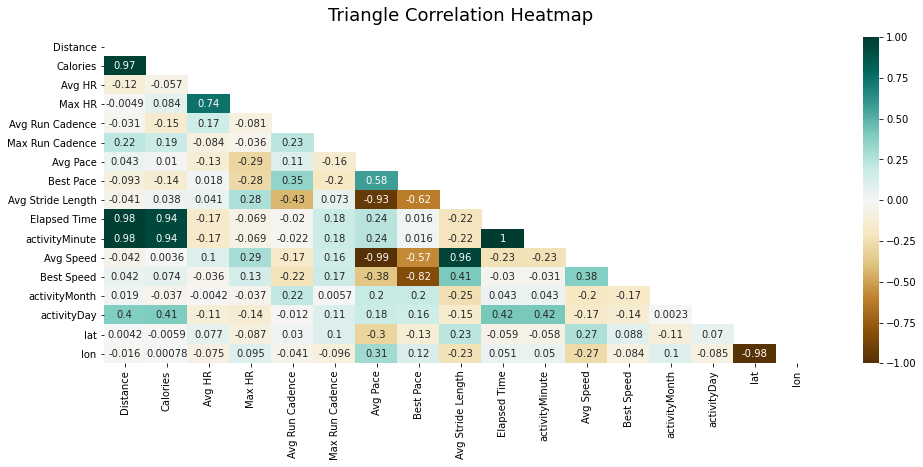

In [38]:
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(activities.corr(), dtype=bool))
heatmap = sns.heatmap(activities.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

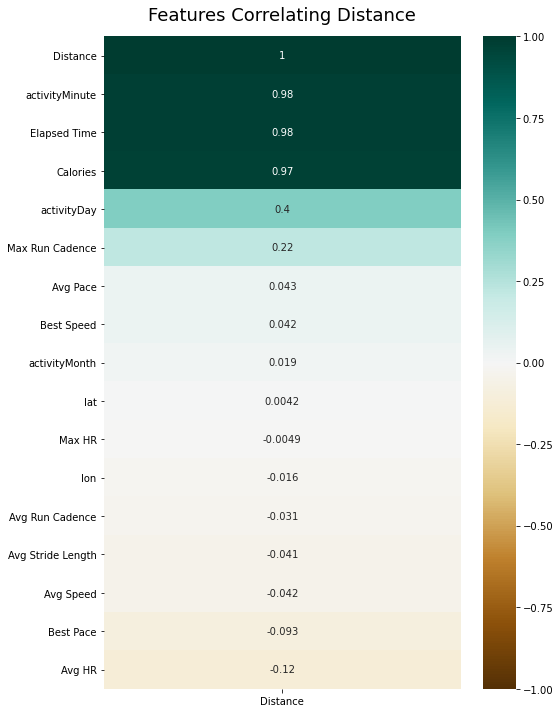

In [39]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(activities.corr()[['Distance']].sort_values(by='Distance', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating Distance', fontdict={'fontsize':18}, pad=16);

In [40]:
f = pd.DataFrame(data=zip(activities.lat.tolist(), activities.lon.tolist()),columns=['lat', 'lon'])
f.head()

,lat,lon
0,48.8534,2.3488
1,48.8534,2.3488
2,48.8534,2.3488
3,48.8534,2.3488
4,48.8534,2.3488


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'Average HR repartition')]

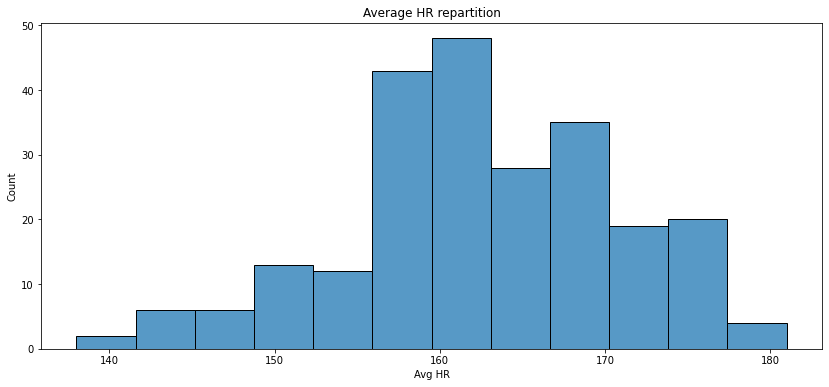

In [42]:
plt.figure(figsize = (14,6))
sns.histplot(data = activities, x = "Avg HR").set(title="Average HR repartition")

# Most probable value during the run would be around 160 BPM.

The correlation coefficient between cadence and speed: -0.16518034199089895


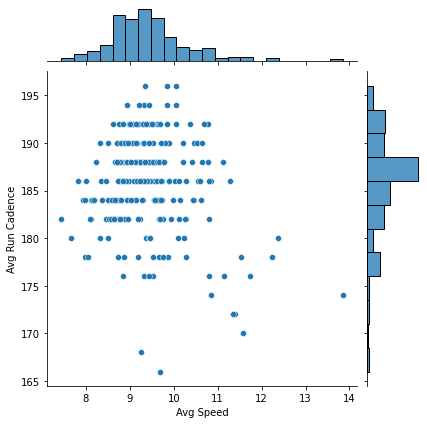

In [43]:
sns.jointplot(x='Avg Speed',y='Avg Run Cadence', data=activities.dropna(),kind='scatter')
print("The correlation coefficient between cadence and speed:", activities['Avg Speed'].corr(activities['Avg Run Cadence']))

The correlation coefficient between Stride Length and speed: 0.9589733882530974


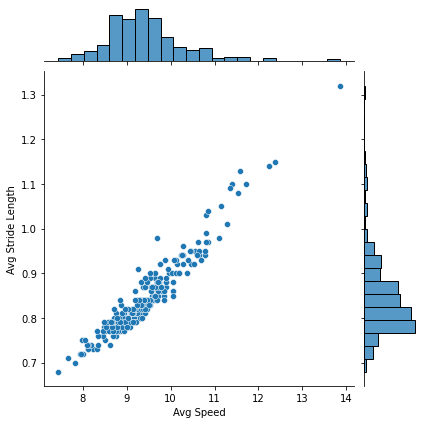

In [44]:
sns.jointplot(x='Avg Speed',y='Avg Stride Length', data=activities.dropna(),kind='scatter')
print("The correlation coefficient between Stride Length and speed:", activities['Avg Speed'].corr(activities['Avg Stride Length']))

The correlation coefficient between Stride Length and Run Cadence: -0.43258184475398753


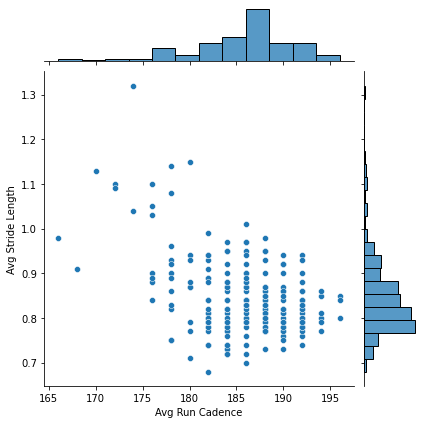

In [45]:
sns.jointplot(x='Avg Run Cadence',y='Avg Stride Length', data=activities.dropna(),kind='scatter')
print("The correlation coefficient between Stride Length and Run Cadence:", activities['Avg Run Cadence'].corr(activities['Avg Stride Length']))

[Text(0.5, 1.0, 'Avg Speed by Month')]

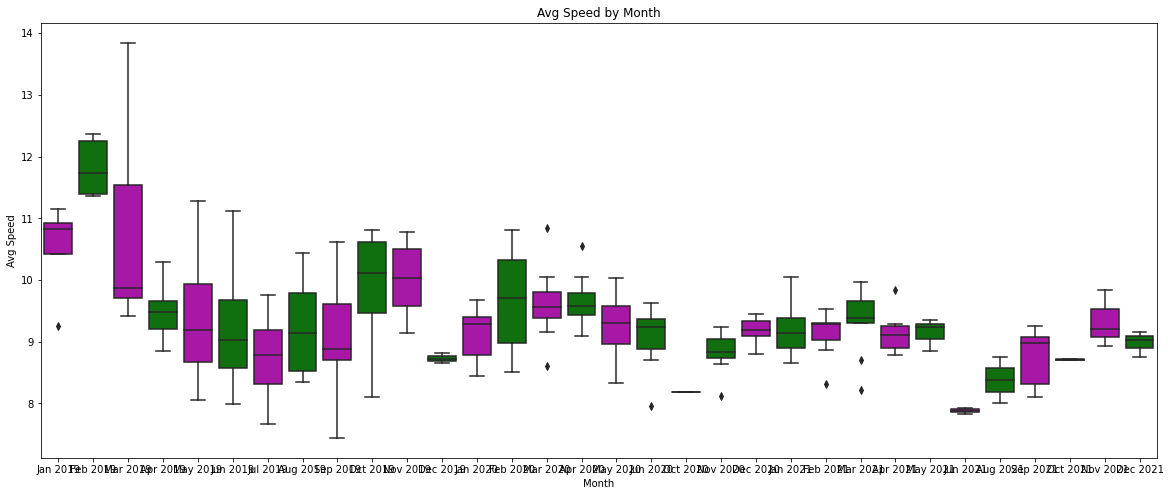

In [46]:
plt.figure(figsize=(20,8))

#add extra column with month for every running session
activities['Month'] = activities['Date'].dt.strftime('%b') + " " + activities['Date'].dt.strftime('%Y')
#sort datataset by date in ascending order
activities.sort_values(by='Date', inplace=True)
#plot boxplots grouped by month
sns.boxplot(x='Month',y='Avg Speed', palette=["m", "g"], data=activities.dropna()).set(title = 'Avg Speed by Month')

In [47]:
## Divide the Heart Rate Zones from the data into Zones and create a new column
# < 114 - Very Light
# 114-133 - Light
# 133-152 - Moderate
# 152-171 - Hard
# >171 - Very Hard
## do using lambda: apply a function

def get_hr_zones(avgHR):
    if avgHR < 114:
        return "Very Light"
    elif avgHR >= 114 and avgHR < 133:
        return "Light"
    elif avgHR >= 133 and avgHR < 152:
        return "Moderate"
    elif avgHR >= 152 and avgHR < 171:
        return "Hard"
    else:
        return "Very Hard"

In [48]:
activities["activityLevel"] = activities["Avg HR"].apply(get_hr_zones)

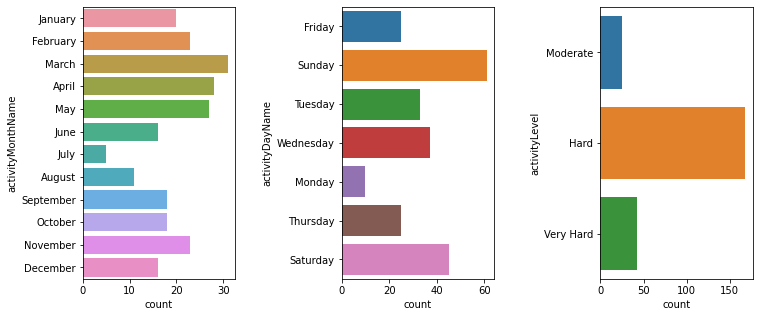

In [49]:
cols_var = ["activityMonthName", "activityDayName", "activityLevel"]

# Count plots of categorical variables

fig, axes = plt.subplots(1, 3, figsize=(12, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 3:
        ax.set_visible(False)
        continue
    sns.countplot(y = cols_var[i], data=activities, ax=ax)

In [50]:
#save into a csv
activities.to_csv("RUNNING.csv", sep=";", index=False, header=True)

## floors, steps, sleeps : cleaning

In [51]:
floors = pd.read_csv("Floors.csv")

In [52]:
floors.head()

,Floors Climbed,Floors Climbed.1,Goal,Floors Descended,year
0,Jan,0,0,0,2019
1,Feb,77,40,119,2019
2,Mar,343,180,473,2019
3,Apr,440,300,483,2019
4,May,587,310,618,2019


In [53]:
floors["month"] = pd.to_datetime(floors["Floors Climbed"], format = '%b').dt.month
floors["month"] = floors.month.map("{:02}".format)

floors["year"] = floors["year"].apply(str)

In [54]:
floors["mm-yyyy"] = floors["year"] + "-" + floors["month"]

In [55]:
floors["Floors Climbed1"] = floors["Floors Climbed.1"]
#floors.drop(["Floors Climbed.1"], axis=1, inplace=True)

In [56]:
floors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Floors Climbed    35 non-null     object
 1   Floors Climbed.1  35 non-null     int64 
 2   Goal              35 non-null     int64 
 3   Floors Descended  35 non-null     int64 
 4   year              35 non-null     object
 5   month             35 non-null     object
 6   mm-yyyy           35 non-null     object
 7   Floors Climbed1   35 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 2.3+ KB


In [57]:
floors.head()

,Floors Climbed,Floors Climbed.1,Goal,Floors Descended,year,month,mm-yyyy,Floors Climbed1
0,Jan,0,0,0,2019,01,2019-01,0
1,Feb,77,40,119,2019,02,2019-02,77
2,Mar,343,180,473,2019,03,2019-03,343
3,Apr,440,300,483,2019,04,2019-04,440
4,May,587,310,618,2019,05,2019-05,587


In [58]:
floors["Floors Descended"] = -abs(floors["Floors Descended"])

In [59]:
floors["Floors Climbed1"].sum() / floors.shape[0]

365.4

<BarContainer object of 35 artists>

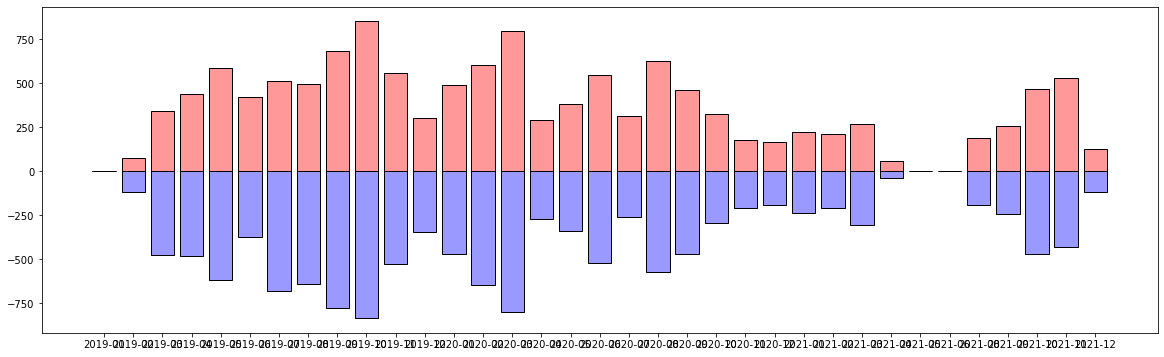

In [60]:
# http://cs-tklab.na-inet.jp/~tkouya/python/scipy-lectures/intro/matplotlib/auto_examples/plot_bar_ex.html

neg = floors["Floors Descended"].tolist()
pos = floors["Floors Climbed1"].tolist()
dd = floors["mm-yyyy"].tolist()

fig = plt.figure(figsize = (20,6))
#ax = plt.subplot(111)
#ax.bar(dd, neg, width=2, color='r')
#ax.bar(dd, pos, width=1, color='b')

plt.bar(dd, neg, facecolor='#9999ff', edgecolor='black')
plt.bar(dd, pos, facecolor='#ff9999', edgecolor='black')


In [61]:
floors.to_csv("Floors.csv", index=False)

## steps

In [62]:
steps = pd.read_csv("Steps.csv")

In [63]:
steps.head()

,Steps,Actual,Goal,year
0,Jan,0,0,2019
1,Feb,39439,48010,2019
2,Mar,283668,247410,2019
3,Apr,385926,426420,2019
4,May,591441,518500,2019


In [64]:
steps["month"] = pd.to_datetime(steps["Steps"], format = '%b').dt.month
steps["month"] = steps.month.map("{:02}".format)

steps["year"] = steps["year"].apply(str)

In [65]:
steps["mm-yyyy"] = steps["year"] + "-" + steps["month"]

In [66]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Steps    35 non-null     object
 1   Actual   35 non-null     int64 
 2   Goal     35 non-null     int64 
 3   year     35 non-null     object
 4   month    35 non-null     object
 5   mm-yyyy  35 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.8+ KB


In [67]:
steps.head()

,Steps,Actual,Goal,year,month,mm-yyyy
0,Jan,0,0,2019,01,2019-01
1,Feb,39439,48010,2019,02,2019-02
2,Mar,283668,247410,2019,03,2019-03
3,Apr,385926,426420,2019,04,2019-04
4,May,591441,518500,2019,05,2019-05


In [68]:
steps.groupby(['year'])["Actual"].sum().tolist()

[4740786, 4413648, 2031574]

<AxesSubplot:ylabel='Actual'>

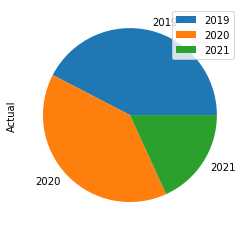

In [69]:
steps.groupby(['year']).sum().plot(kind='pie', y='Actual')

In [70]:
steps.to_csv("Steps.csv", index=False)

## sleeps

In [71]:
sleep = pd.read_csv("Sleep.csv")

In [72]:
sleep.head()

,Sleep Time,Hrs,Hrs.1,year
0,Feb 24,7.7,7:43 hrs,2019
1,Mar 3,8.6,8:35 hrs,2019
2,Mar 10,8.5,8:30 hrs,2019
3,Mar 24,7.4,7:25 hrs,2019
4,Mar 31,7.5,7:29 hrs,2019


In [73]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sleep Time  128 non-null    object 
 1   Hrs         128 non-null    float64
 2   Hrs.1       128 non-null    object 
 3   year        128 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.1+ KB


In [74]:
sleep["year"] = sleep["year"].apply(str)

In [75]:
sleep["Hrs"].median()

8.5

In [76]:
sleeps.to_csv("Sleep.csv", index=False)